<a href="https://colab.research.google.com/github/subhashpolisetti/Automated-ML-with-PyCaret/blob/main/Univariate_Time_Series_Forecasting_PyCaret_With_Exogenous_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Univariate with Exogenous Variables

This project focuses on univariate time series forecasting using PyCaret, a low-code machine learning library in Python. The primary objective is to predict a target variable based on its historical values while incorporating additional exogenous variables that may impact the forecast.

## Key Steps

1. **Data Preparation**: The dataset is preprocessed to ensure proper formatting for time series analysis. This includes handling missing values and ensuring temporal ordering of the data.

2. **Experiment Setup**: The forecasting experiment is initialized using PyCaret's setup function, where the target variable and relevant exogenous predictors are specified.

3. **Model Training and Comparison**: Various time series forecasting models, such as ARIMA and Prophet, are trained and evaluated. This process aims to determine the best-performing model for the given data.

4. **Finalization and Prediction**: The selected model is finalized and used to make future predictions. Exogenous variables are incorporated into the forecasting process to enhance accuracy.

5. **Evaluation**: The performance of the model is assessed using metrics like Root Mean Square Error (RMSE) and Mean Absolute Error (MAE), providing insights into its forecasting capabilities.

This project demonstrates the effectiveness of using PyCaret for time series forecasting, showcasing a streamlined approach to modeling and prediction.


In [52]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from pycaret.time_series import *
import matplotlib.pyplot as plt

In [53]:
temperature_data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
temperature_data = pd.read_csv(temperature_data_url)

In [54]:
# Display the first few rows of the dataset
temperature_data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [55]:
# Renaming columns for clarity
temperature_data.columns = ['Date', 'Min_Temperature']

In [56]:
# Converting the 'Date' column to datetime format
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])

In [57]:
# Setting 'Date' as the index of the DataFrame
temperature_data.set_index('Date', inplace=True)

In [58]:
# Setting frequency of the index to daily
temperature_data = temperature_data.asfreq('D')

In [59]:
# Checking for and handling missing values
print("Missing values in the dataset:")
print(temperature_data.isnull().sum())

Missing values in the dataset:
Min_Temperature    2
dtype: int64


In [60]:
# Optional: Fill missing values if any exist before proceeding with setup
temperature_data.fillna(method='ffill', inplace=True)  # Forward fill as an example


In [61]:
# Displaying the dataset after preprocessing
temperature_data.head()

,Min_Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [62]:
# Setting up the PyCaret environment for time series forecasting
random_seed = 123  # Meaningful variable name for session ID
setup_config = setup(data=temperature_data,
                     target='Min_Temperature',
                     fold=3,
                     session_id=random_seed,  # Using meaningful variable
                     use_gpu=True)  # Enable GPU if available

,Description,Value
0,session_id,123
1,Target,Min_Temperature
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3652, 1)"
5,Transformed data shape,"(3652, 1)"
6,Transformed train set shape,"(3651, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

In [63]:
# Comparing different models to find the best one
best_time_series_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
theta,Theta Forecaster,0.2863,0.2224,0.7774,0.7774,0.0502,0.0535,0.0733
exp_smooth,Exponential Smoothing,0.2864,0.2225,0.7778,0.7778,0.0502,0.0535,0.7367
ets,ETS,0.2864,0.2225,0.7778,0.7778,0.0502,0.0535,0.3533
croston,Croston,0.2873,0.2232,0.7802,0.7802,0.0508,0.0537,0.0367
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2987,0.2321,0.8112,0.8112,0.0524,0.0559,0.7033
auto_arima,Auto ARIMA,0.3085,0.2397,0.8378,0.8378,0.0545,0.0579,77.2267
naive,Naive Forecaster,0.3314,0.2575,0.9000,0.9000,0.0590,0.0624,0.1467
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.3491,0.2712,0.9479,0.9479,0.0614,0.0661,0.2000
stlf,STLF,0.3630,0.2820,0.9859,0.9859,0.0654,0.0685,0.0933
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.3746,0.2910,1.0172,1.0172,0.0662,0.0714,0.1400


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [64]:
# Training the best model on the entire dataset
final_time_series_model = create_model(best_time_series_model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,1990-12-27,0.0261,0.0203,0.0709,0.0709,0.0052,0.0052
1,1990-12-28,0.0514,0.0400,0.1397,0.1397,0.0103,0.0103
2,1990-12-29,0.7813,0.6070,2.1217,2.1217,0.1351,0.1449
Mean,NaT,0.2863,0.2224,0.7774,0.7774,0.0502,0.0535
SD,NaT,0.3502,0.2721,0.9510,0.9510,0.0601,0.0647


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [71]:
tuned_model = tune_model(final_time_series_model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,1990-12-27,0.0261,0.0203,0.0709,0.0709,0.0052,0.0052
1,1990-12-28,0.0514,0.0400,0.1397,0.1397,0.0103,0.0103
2,1990-12-29,0.7813,0.6070,2.1217,2.1217,0.1351,0.1449
Mean,NaT,0.2863,0.2224,0.7774,0.7774,0.0502,0.0535
SD,NaT,0.3502,0.2721,0.9510,0.9510,0.0601,0.0647


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    8.2s finished


In [72]:
# Making future predictions (e.g., next 30 days)
future_predictions = predict_model(tuned_model, fh=30)

In [74]:
# Saving the tuned model
model_filename = 'tuned_temperature_model'
save_model(tuned_model, model_filename)  # Save the model to a file

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ThetaForecaster(deseasonalize=False,
                                                                                 sp=2))]))]),
 'tuned_temperature_model.pkl')

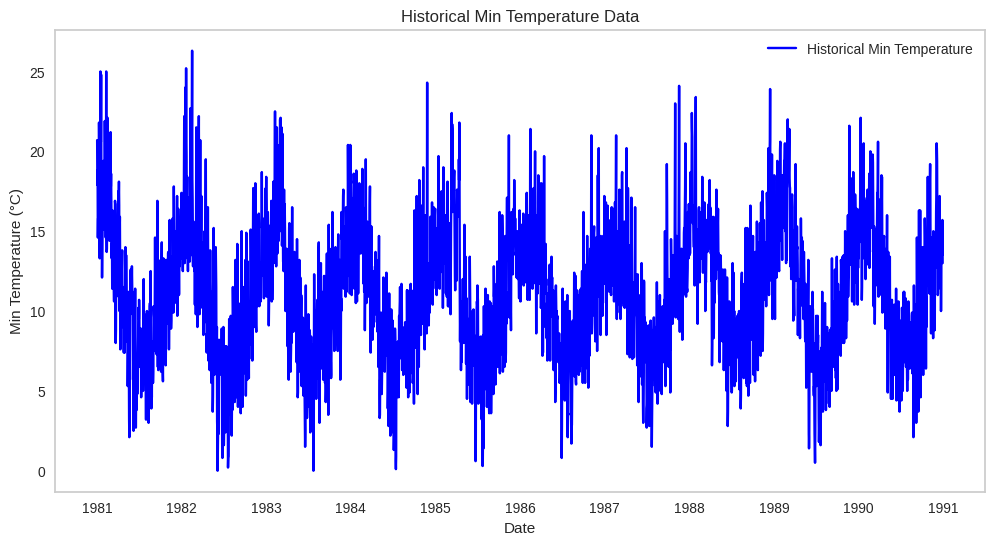

In [75]:
import matplotlib.pyplot as plt

# Plotting historical temperatures
plt.figure(figsize=(12, 6))
plt.plot(temperature_data.index, temperature_data['Min_Temperature'], label='Historical Min Temperature', color='blue')
plt.title('Historical Min Temperature Data')
plt.xlabel('Date')
plt.ylabel('Min Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


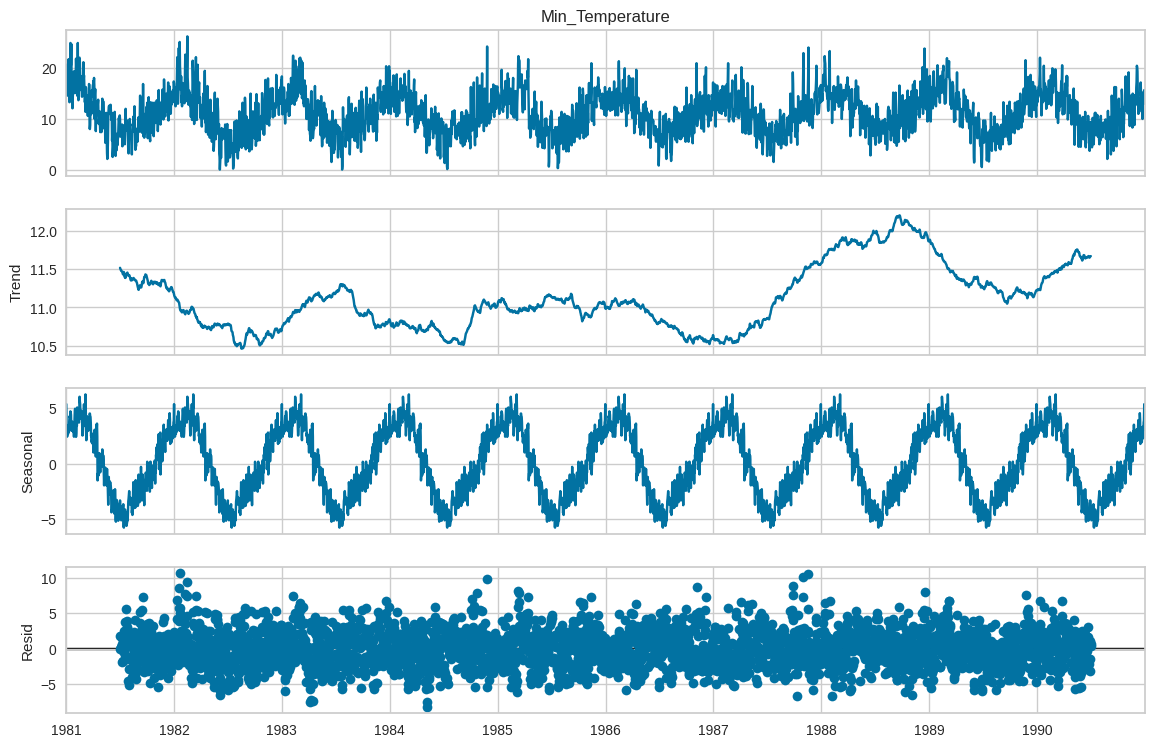

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decomposition = seasonal_decompose(temperature_data['Min_Temperature'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()
